In [10]:
# Import necessary libraries
from fnal import Dataset
from utilities import plot_planes, plot_crate, plot_tpc, plot_wire_planes, plot_waveform, plot_ffts, plot_planes_new

In [2]:
# Load the data and MC datasets
input_path = '/Users/mueller/Projects/channel_map/'
data = [Dataset(input_path, 10097), Dataset(input_path, '09394')]
labels = ['Run 10097', 'Run 9394']

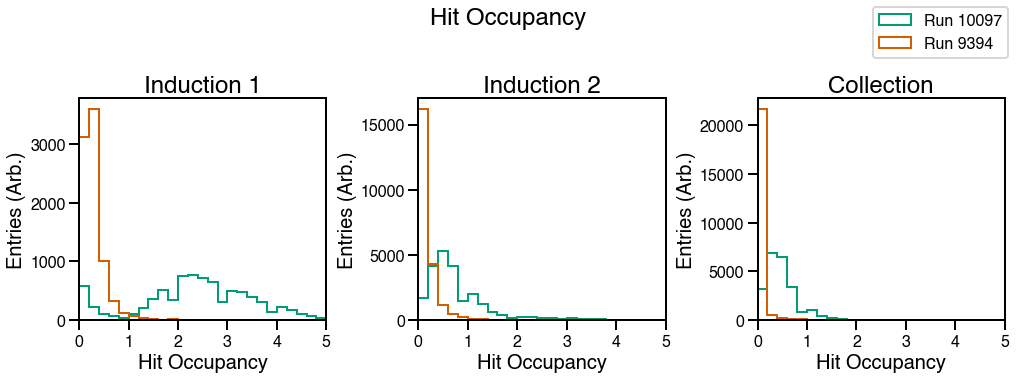

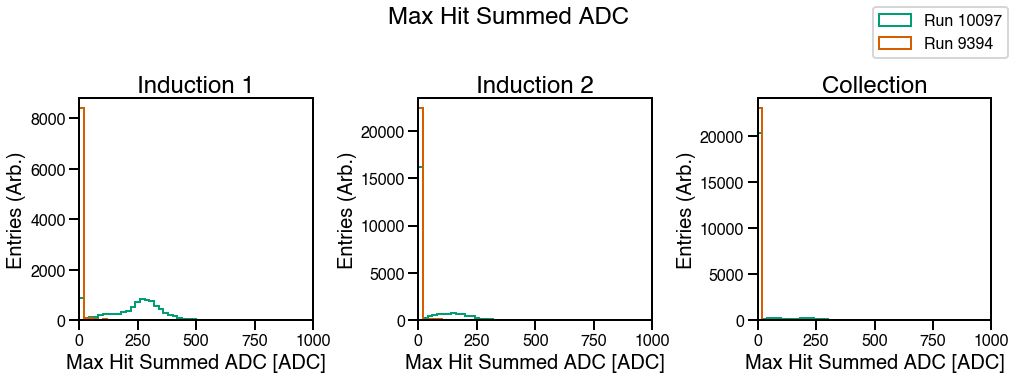

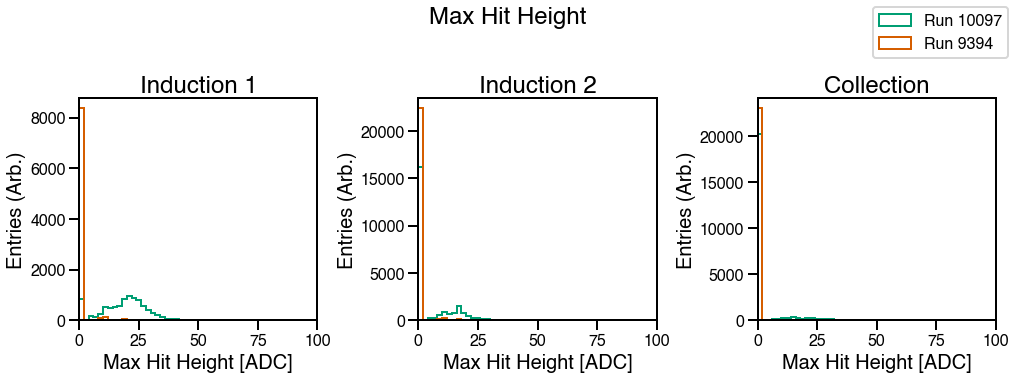

In [4]:
plot_planes_new(data, labels, 'hit_occupancy', 'Hit Occupancy')
plot_planes_new(data, labels, 'mhit_sadc', 'Max Hit Summed ADC')
plot_planes_new(data, labels, 'mhit_height', 'Max Hit Height')

In [2]:
# Load the data and MC datasets
input_path = '/Users/mueller/Projects/channel_map/'
data = [Dataset(input_path, 10169), Dataset(input_path, 10174)]
labels = ['Run 10169 (1 kHz)', 'Run 10174 (2 kHz)']

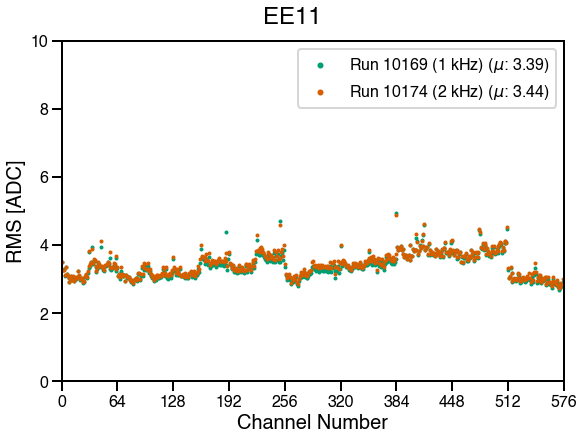

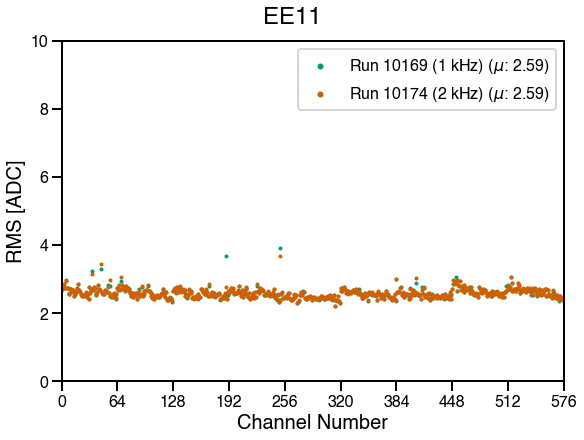

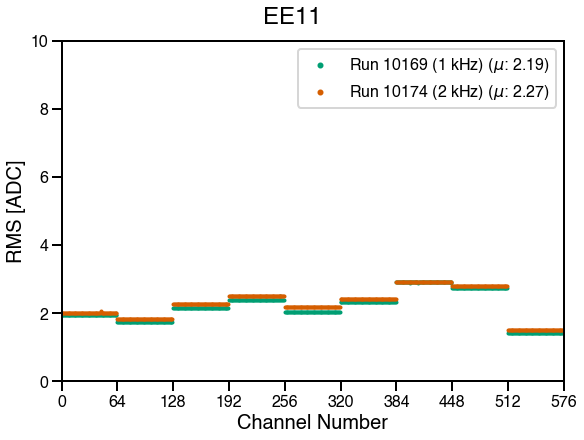

In [4]:

plot_crate(data, labels, metric='raw_rms', component='EE11', label_mean=True)
plot_crate(data, labels, metric='int_rms', component='EE11', label_mean=True)
plot_crate(data, labels, metric='coh_rms', component='EE11', label_mean=True)

In [2]:
# Load the data and MC datasets
input_path = '/Users/mueller/Projects/channel_map/'
data = [Dataset(input_path, 10097), Dataset(input_path, '0001', mc=True)]
labels = ['Run 10097', 'Monte Carlo']

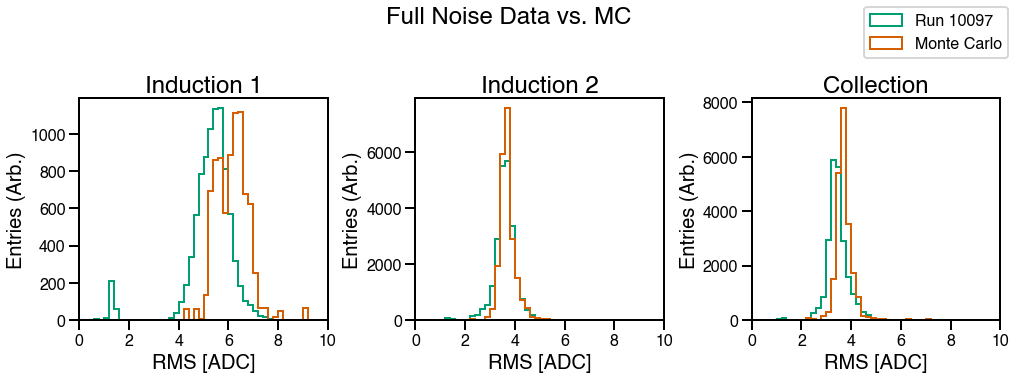

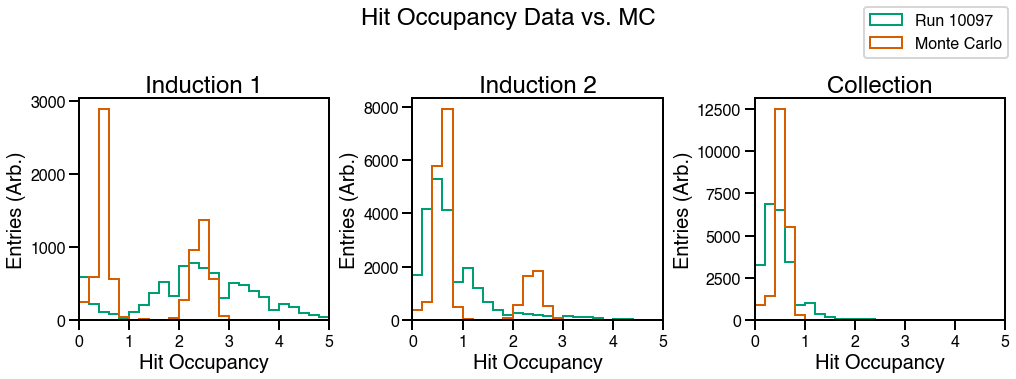

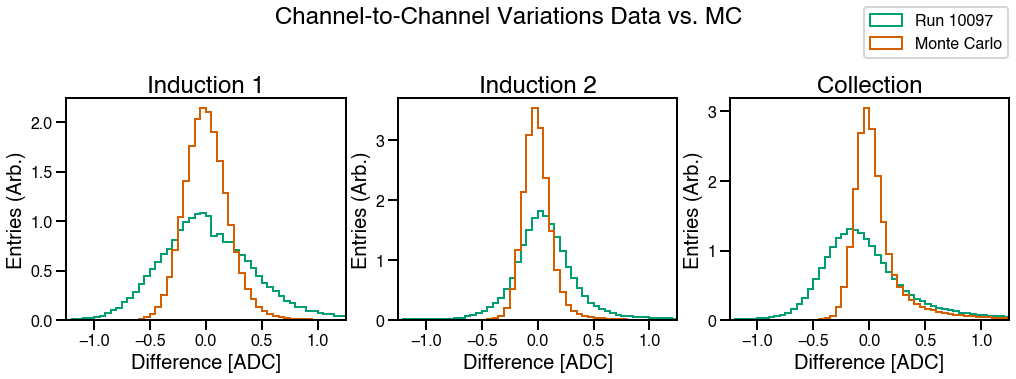

In [5]:
plot_planes_new(data, labels, 'raw_rms', 'Full Noise Data vs. MC')
plot_planes_new(data, labels, 'hit_occupancy', 'Hit Occupancy Data vs. MC')
plot_planes_new(data, labels, 'raw_rms_c2cabs', 'Channel-to-Channel Variations Data vs. MC', normalize=True)

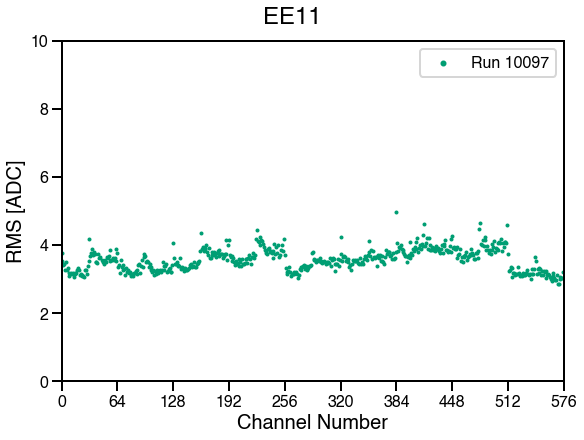

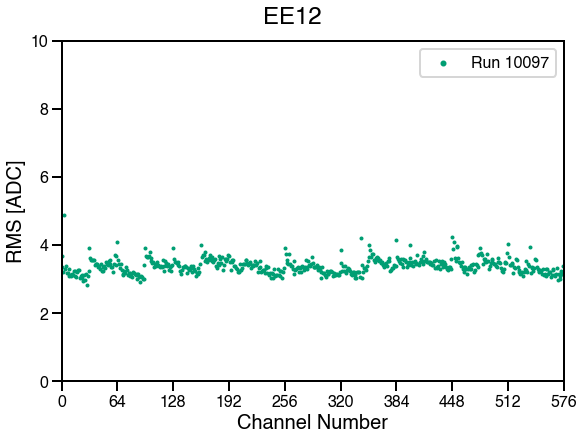

In [15]:
plot_crate([data[0],], [labels[0],], metric='raw_rms', component='EE11')
plot_crate([data[0],], [labels[0],], metric='raw_rms', component='EE12')

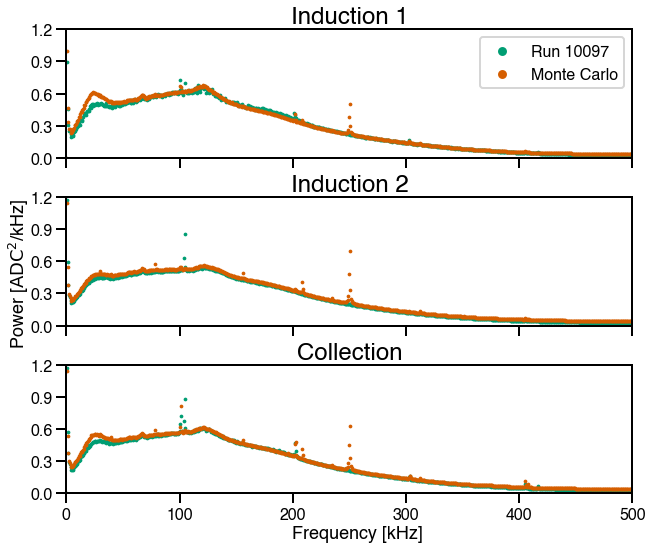

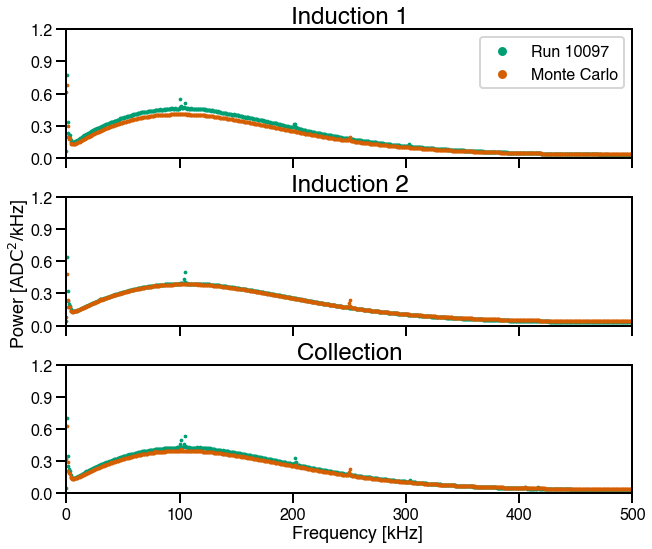

In [3]:
# Comparison of FFTs in data and MC.
plot_ffts(data, labels, 'raw')
plot_ffts(data, labels, 'int')

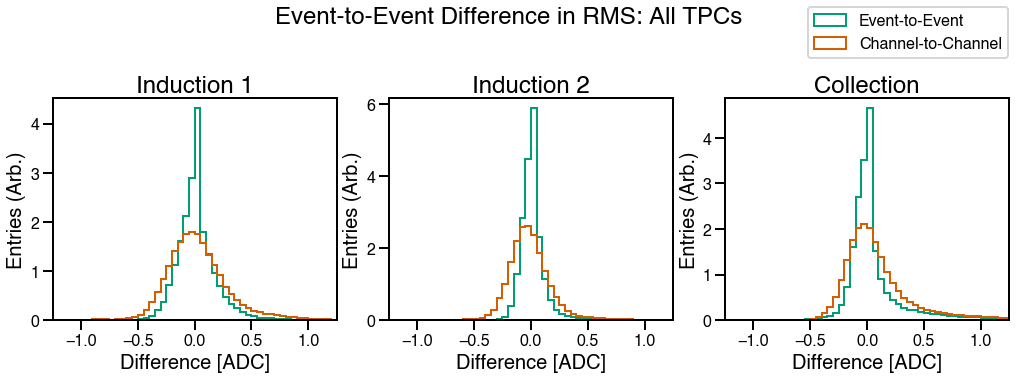

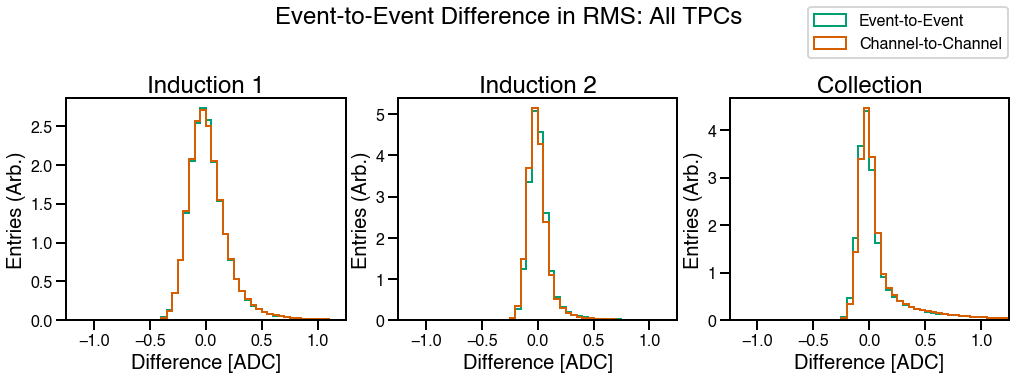

In [9]:
# Comparison of event-to-event and channel-to-channel variations between data and MC.
plot_planes(data[0], 'int_rms', ['e2eabs', 'c2cabs'])
plot_planes(data[1], 'int_rms', ['e2eabs', 'c2cabs'])

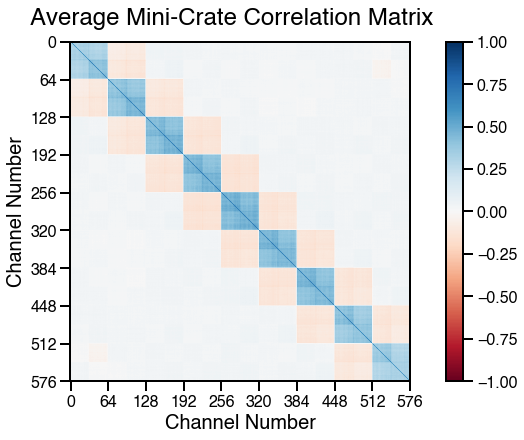

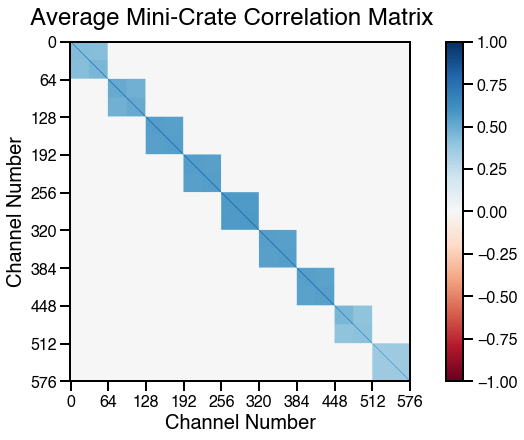

In [10]:
# Comparison of correlation matrices between data and MC.
data[0].plot_correlation_matrix('all')
data[1].plot_correlation_matrix('all')